[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PyGIS222/Fall2019/blob/master/LessonM61_ImagesMaps.ipynb)

## Notebook Lesson 6.1

# Plotting Images and Maps with Matplotlib

This Jupyter Notebook is part of Module 6 of the course GIS222 (Fall2019). Carefully study the content of this Notebook and use the chance to reflect the material through the interactive examples.

### Introduction

The purpose of **this and the next notebook lessons** in course module 6 is to **prepare you for the final project**. In this lesson, we will learn how to plot images with the module **Matplotlib**, then we will utilize that knowledge to print georeferenced maps and manipulate their content. 

We will show how you can **quickly print geographical data** in Python with the basic coding knowledge that you have gained already and add a bit more information. This basic knowledge might appear not always important, since it is just that - basic. But this basic knowledge, will be the base of your expertise as a Python programmer and it will help you to understand more sophisticated Python tools and applications that you may face during upcoming courses or your career. 

### Content

* Part A. Matplotlib Image tutorial
* Part B. Plotting Geographical Data using Matplotlib
* Part C. Enriching Matplotlib Maps

### Sources
Part A of this lesson adaps elements of the matplotlib [image tutorial](https://matplotlib.org/tutorials/introductory/images.html).

---


<img src="./data/stinkbug.png" width="400" />

Figure 1. *Photograph of a stinkbug stored in the file `./data/stinkbug.png`.*

---
# A. Matplotlib Image tutorial

## Preparation
First, we need to initialize the IPython/Jupyter notebook with the IPython magic command:

In [1]:
%matplotlib inline

This turns on inline plotting, where plot graphics will appear in your
notebook.  This has important implications for interactivity.  For inline plotting, commands in
cells below the cell that outputs a plot will not affect the plot. For example,
changing the color map is not possible from cells below the cell that creates a plot.

For plotting images, we will use the packages **matplotlib.pyplot** and **matlotlib.image**. We have used the former in course module 4 for time series plots of Finnland temperature data. 
First we have to import these packages:

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<div class="alert alert-info">

**Note for Advanced Students**

This tutorial will use matplotlib's imperative-style plotting interface, pyplot.  This interface maintains global state, and is very useful for quickly and easily experimenting with various plot settings. The alternative is the object-oriented interface, which is also very powerful, and generally more suitable for large application
development.  If you'd like to learn about the object-oriented interface, a great place to start is [Matplotlibs User Guide](https://matplotlib.org/tutorials/introductory/usage.html).  For now, let's get on with the imperative-style approach.

</div>


## Importing image data into Numpy arrays

First, we have to load an image into a numpy array. Just as a side note: loading images is supported by the [Pillow](https://pillow.readthedocs.io/en/latest/) library. 

The image used in this example is a PNG file, which is diplayed at the top of this notebook. You can find the corresponding image file `stinkbug.png` in the folder `./assignments_M6/data`. 

It's a 24-bit RGB PNG image (8 bits for each of R, G, B).  Depending on where you get your data, the other kinds of image that you'll most likely encounter are RGBA images, which allow for transparency, or single-channel grayscale (luminosity) images.  

To import the image into a numpy array, we can use the function `matplotlib.imread()`

In [3]:
img = mpimg.imread('./data/stinkbug.png')

Now, the imported array `img` looks like this:

In [4]:
print(img)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


And the shape of the image array is:

In [5]:
print(img.shape)

(375, 500, 3)


From the shape of the array, you can see it has 375 x 500 pixels. In the printed array above, each inner list represents a pixel. Also there are three values for each pixel, because this is a RGB image, which has three image bands. Since it's a black and white image, R, G, and B are all similar. 


## Plotting numpy arrays as images

Once, you have your data in a numpy array (either by importing it, or by
generating it), you can render it. In Matplotlib, this is performed
using the function `matplotlib.pyplot.imshow`. Here we'll assign it to
a plot object `imgplot`. This object gives you an easy way to manipulate the
plot from the prompt. **You can also plot any numpy array like this:**

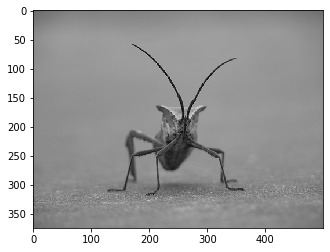

In [6]:
imgplot = plt.imshow(img)

## Applying Pseudocolor Schemes to Image Plots

Pseudocolor can be a useful tool for enhancing contrast and
visualizing your data more easily. This is especially useful when
making presentations of your data using projectors - their contrast is
typically quite poor. Or if you have a data-array that contains other data than an image, e.g. temperature data over a geographical arrea.

Pseudocolor is only relevant to single-channel, grayscale, luminosity
images. We currently have an RGB image.  Since R, G, and B are all
similar (see for yourself above or in your data), we can just pick one
channel of our data, by slicing it. Let's just select the first band of the RGB image:

In [7]:
lum_img = img[:, :, 0]

Let's look at the shape of this new array and then plot it again.

In [8]:
lum_img.shape

(375, 500)

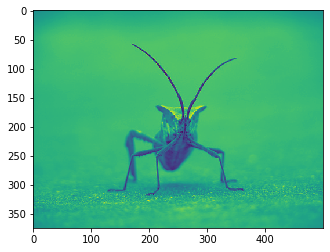

In [9]:
plt.imshow(lum_img)

Now, with a luminosity (one band) image, the default colormap is applied. The default is called **viridis** colormap.  There are plenty of others to choose from, for example:

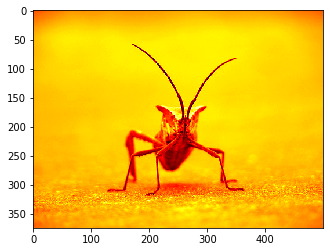

In [10]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the
method `matplotlib.image.Image.set_cmap`:

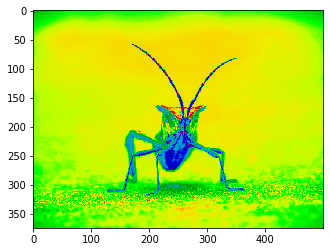

In [11]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

<div class="alert alert-info">

**Note**

However, remember that in the IPython notebook with the inline backend,
you can't make changes to plots that have already been rendered.  If you
create imgplot here in one cell, you cannot call set_cmap() on it in a later
cell and expect the earlier plot to change. If you want to apply several commands to one image, make sure that you enter these commands together in one cell.  plt commands will not change plots from earlier cells.</p></div>

There are many other colormap schemes available. 
<img src="./img/M61_ExampleColorbars.png" width="400" />
Figure 2: *Example solor maps provided by Matplotlib. Find a complete list and images of [ colormaps on the matplotlib pages](https://matplotlib.org/tutorials/colors/colormaps.html).*




**And again, you can also plot any numpy array like this**

## Color scale reference

It's helpful to have an idea of what value a color represents.  We can
do that by adding color bars.

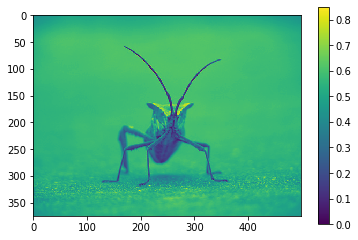

In [12]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

This adds a colorbar to your existing figure. This won't
automatically change if you change you switch to a different
colormap, you have to re-create your plot, and add in the colorbar
again.


## Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand
the contrast in a particular region while sacrificing the detail in
colors that don't vary much, or don't matter.  A good tool to find
interesting regions is the histogram.  To create a histogram of our
image data, we use the `matplotlib.pyplot.hist` function. (We are adding a semicolon to the end of the next statement, to suppress output of the entire array and to only receive the histogram).



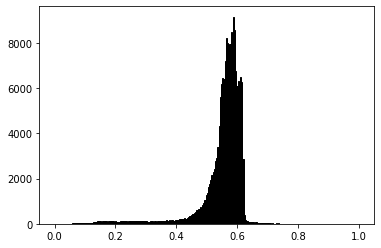

In [13]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

Most often, the "interesting" part of the image is around the peak,
and you can get extra contrast by clipping the regions above and/or
below the peak.  In our histogram, it looks like there's not much
useful information in the high end (not many white things in the
image).  Let's adjust the upper limit, so that we effectively "zoom in
on" part of the histogram. We do this by passing the clim argument to
imshow.

You can specify the clim in the call to ``plot``.

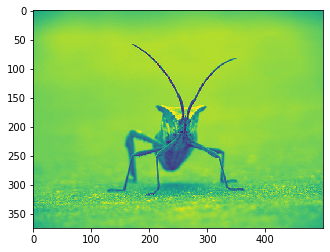

In [14]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

You could also do this by calling the method `matplotlib.image.Image.set_clim` for the image plot object, but in this case, make sure that you do so in the same cell as your plot command as it will not change plots from earlier cells. An example is shown in the next code cell. 

In addition, let's compare the before and after plots by adding subplots to the image object using the method `add_subplot()`. We also want to add a title, repeat the adjustment of the data range for the "after" image, amd plot a horizontal colorbar with pre-defined tick marks).

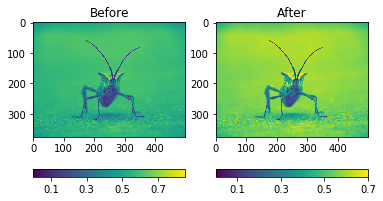

In [15]:
fig = plt.figure()              # creating image object 'fig'
a = fig.add_subplot(1, 2, 1)    # adding subplot to the image object, assing to subplot object
imgplot = plt.imshow(lum_img)   # plot "before" image
a.set_title('Before')           # title for before-image
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')  # horizontal colorbar
a = fig.add_subplot(1, 2, 2)    # add second subplot to the image object
imgplot = plt.imshow(lum_img)   # plot "after" image
imgplot.set_clim(0.0, 0.7)      # adjust color ranges to increase contrast
a.set_title('After')            # title for after-image
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')  # horizontal colorbar

---
# B. Plotting Geographical Data using Matplotlib

Now you have learned to plot images using matplotlib. With that, you are also able to plot any kind of 2D data arrays. This includes geographical datasets!!! For this purpose, we will dive deeper into plotting 2D-data with **Matplotlib**. We will illustrate this on topographic (elevation) data given in standard geographical coordinates, hence, in a global reference system (of latitudes and longitudes) or also called **world geodetic system** of the [WGS84](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84). In this part, you will learn to generate maps of geographical data without diving deeper into packages and coding of geographical projections, as these will be subject of the following course GIS 322 (Programming Principles in GIS II). Plotting data in geographical coordinates like an image using matplotlib, will be the same as plotting the data in a simple Mercator projection: 

<img src="./img/M61_MercatorProjection.png" width="300" />

Figure 2: *A world map in Mercator projection. The Mercator projection is a cylindrical map projection. Linear scale is constant in every direction around any point, thus preserving the angles and the shapes of small objects and fulfilling the conditions of a conformal map projection. As a side effect, the Mercator projection inflates the size of objects away from the equator. Find more details: ["Mercator Projection" on Wikipedia](https://en.wikipedia.org/wiki/Mercator_projection).*

## Geocoding the Matplotlib Plot

But besides plotting geographical data or images, we need too a add some more information to our matplotlib plot, to retrieve a satisfying map. Foremost, we would like to have the axes of the map image correctly labeled, hence, geocoded. And maybe, we also would like different ways of plotting the data. So let's look into an example. We begin with importing numpy and the two matplotlip packages, which we will be using.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

The dataset we are using in this example, is a raster dataset that contains eleveation data over a small region in Texas, east of Houston.
You can view the data in the file `terrain.dat` stored in the `assignments_M6/data` folder.
The dataset contains elevation data for a 721x721 data grid, which is stored similar to a geotiff image, but in text format. The header of the file provides some information on the content, then follow 721 lines with 721 columns of height data (in meter above sea level).

```
ncols        721
nrows        721
xllcorner    -97.000138888889
yllcorner    29.999861111111
cellsize     0.00138888889
NODATA_value -32767
146 140 141 133 139 136 137 135 131 125 124 128 125 127 128 128 131 129 127 128 126 123 120 ...
147 146 140 138 141 138 135 133 129 128 126 127 126 127 126 130 130 132 126 125 121 122 120 ...
141 143 145 139 139 138 135 132 129 127 124 124 124 125 126 124 130 126 125 125 126 125 121 ...
...
```

The dataset has also some no-data values, indicated by values of -32767. And you can see information on the geographical coordinates of the raster points.
The first thing to do, is to import the data using the `genfromtxt()` function from numpy. We could also use pandas (optional content of M6) to read the file, but since matplotlib interacts with numpy arrays, it is faster at this point to stay with numpy only. Let's define the filename and read the file, skipping the 6 lines of the header using the parameter `skip_header` and indicating a space `delimiter`:

In [17]:
filename = "./data/terrain.dat"  # Elevation data from region in Texas
terrain = np.genfromtxt(filename, delimiter=' ', skip_header=6) 

Let's first have a brief look into the dataset, to see the size and the maximum heigth values:

In [18]:
print("Size of the data array: ", terrain.shape)
print("Maximum height in the data array: ", np.nanmax(terrain))

Size of the data array:  (721, 721)
Maximum height in the data array:  199.0


This looks good. The imported dataset has the correct shape and the height values seem to make sense. Now we can plot the data using the `imshow()` function similar to above. This time we are choosing the colorbar `gist_earth`.

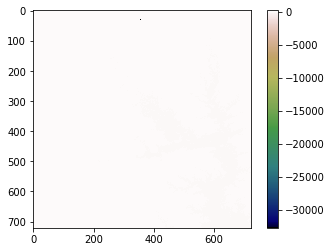

In [19]:
plt.imshow(terrain, cmap="gist_earth") 
plt.colorbar()

Ups, what happened? Any idea why we get these extremely negative values and no values in the image? Of course, we didn't ajust the nodata values and they do interfere with the plotting process, because matplotlib misinterprets -32767 as data values. So let's redefine the nodata values with actual `numpy.nan` values, check the new minimum height and then plot the data again.

In [20]:
terrain[terrain == -32767] = np.nan
np.nanmin(terrain)

32.0

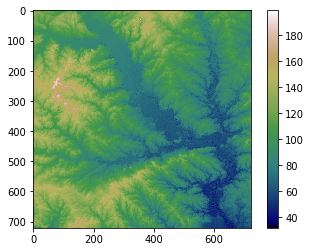

In [21]:
plt.imshow(terrain, cmap="gist_earth") 
plt.colorbar()

Now, we see a beautiful topographic map, showing elevation changes from 32-199 m. This is great, but we still don't have the right axes on it, because we have printed this as image. 

To add the correct axes information, we need to revise the header in the data file, as this provided us coordinates:

    ncols        721
    nrows        721
    xllcorner    -97.000138888889
    yllcorner    29.999861111111
    cellsize     0.00138888889
    NODATA_value -32767
    
The header informs us about the x and y coordinates of the lower left corner in the raster dataset (`xllcorner` and `yllcorner`), which are geographical data in the form of longitude (-180..180) and latitude (-90..90). The header also provides information about the grid spacing (or raster pixel size) `cellsize`. And again, we have 721 rows and columns in the raster data. Let's save those data to variables:

In [22]:
xllcorner = -97.000138888889
yllcorner =  29.999861111111
cellsize  =   0.00138888889
[yDim,xDim] = terrain.shape

This information is enougth to identify the correct coordinate for each pixel in our dataset. But, to work with this in a matplotlip plot, we will have to generate a so called `meshgrid`, which is a regular grid, similar to the dataset, that holds the coordinates. That means we will generate two arrays of the same size as the data array `terrain`. One of these new arrays should provide the x-coordinates (longitude) and the other one providing the y-coordinates (latitude) for each item in the data array.

In other words, each item in the two new arrays will stand for the x and y coordinates of an respecitve item in the data array at the same location (indexes). And we are filling the new arrays with the correct coordinate. So first, we create two new empty arrays `x` and `y` that have the same size as our data array:

In [23]:
x = np.empty(terrain.shape)
y = np.empty(terrain.shape)

Next, we want to fill these matrixes with either longitude coordinates (`x`) or latitude coordinates (`y`), for the respective data point at the same location in the data matrix `terrain`.
There are various ways to do that. For example we could itterate over either the columns or the rows in the x or y data matrix and assignt each column/row the correct x/y coordinates. To explain that: in an array for the x-coordinates, all the values in one column would relate to the same longitude, hence have the same coordinate. For the y-coordinates, all the values in one row would relate to the same latitude and retrieve the same latitude value. This is illustrated in the following image:

<img src="./img/M61_meshgrids.png" width="300" />

However, there is an easier way to do that, than writing a for loop. We can generate 1D arrays for the x and y coordinates using the numpy.linspace function, wich works similar to the `range() function`, only that it creates a numpy array and uses start, stop and count parameter. You can review the details on the function on the [numpy documentation pages of linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).
We can derive the start and stop parametr for latitudes and longitudes from the header data above:

In [1]:
x = np.linspace(xllcorner,xllcorner+cellsize*(xDim+1), xDim)
y = np.linspace(yllcorner,yllcorner+cellsize*(yDim+1), yDim)

NameError: name 'np' is not defined

Let's see what are the shape and the first 10 values of the array `x`:

In [25]:
print(x.shape)
print(x[:10])

(721,)
[-97.00013889 -96.99874614 -96.9973534  -96.99596065 -96.9945679
 -96.99317515 -96.99178241 -96.99038966 -96.98899691 -96.98760417]


In [26]:
print(y.shape)
print(y[:10])

(721,)
[29.99986111 30.00125386 30.0026466  30.00403935 30.0054321  30.00682485
 30.00821759 30.00961034 30.01100309 30.01239583]


Looks almost good. But we have to make sure, that the y-array has the right orientation for the latitudes. For that we should flip it:

In [27]:
y = np.flip(y)

And then, from the two 1D-arrays, we can use the `meshgrid()` function to generate 2D-arrays that exactly reflect the correct coordinate arrays, as we want them:

In [28]:
x, y = np.meshgrid(x, y)
x.shape

(721, 721)

You can test the result, by plotting both coordinate matrixes. What you will see is a map of the coordinate values, which change only in one direction. x values should only change in x-direction (longitudes) and y-values should only change in y-direction (latitudes). And we want the higher latitudes at the top of the image, to have the correct north-south orientation. Let's if that works:

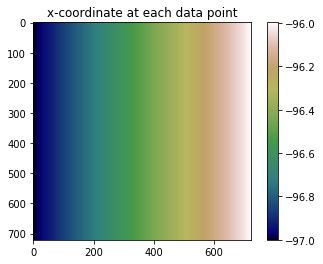

In [29]:
# x values should only change in x-direction (longitudes)
plt.imshow(x, cmap="gist_earth") 
plt.title("x-coordinate at each data point")
plt.colorbar()

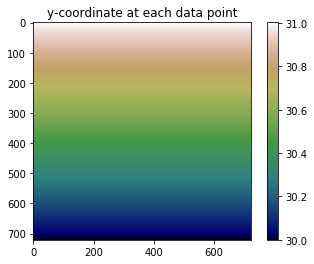

In [30]:
# y-values should only change in y-direction (latitudes)
plt.imshow(y, cmap="gist_earth") 
plt.title("y-coordinate at each data point")
plt.colorbar()

Looks good!

And now, we want to assign the coordinate values to the plot of the `terrain` data from above. To achieve htat, hence, plot our dataset with the correct x and y axes labels, we can use two different types of functions from the pyplot package:
* `contour()`/`contourf()`: Draw contour lines / filled contours.
* `pcolormesh()`: Create a pseudocolor plot with a non-regular rectangular grid.

Both functions allow us to provide x, y and z coordinates of a dataset when generating the plot. z will stands for the `terrain` array. x and y stand for the longitudes and latitudes. The function automatically labels the x and y axes correctly, if we have made no mistake in generating the meshgrid. Let's see if it works:

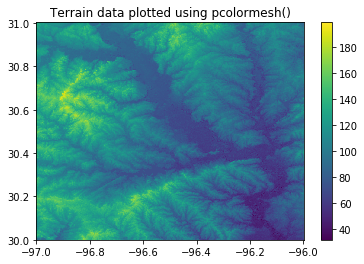

In [31]:
plt.pcolormesh(x,y, terrain) 
plt.title("Terrain data plotted using pcolormesh()")
plt.colorbar()

You can see the x/y axes are labeled correctly and our colorbar is continuous, when using `pcolormesh()`. Let's also try the other two options:

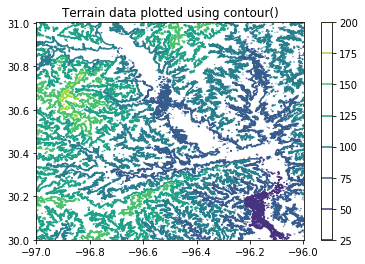

In [32]:
plt.contour(x,y, terrain) 
plt.title("Terrain data plotted using contour()")
plt.colorbar()

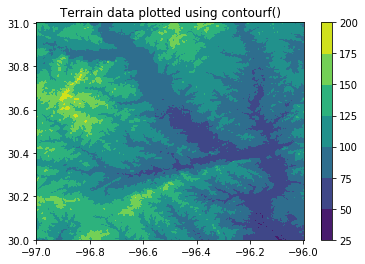

In [33]:
plt.contourf(x,y, terrain) 
plt.title("Terrain data plotted using contourf()")
plt.colorbar()

The function `contour()` plots indeed only contour lines. While the function `contourf()` fills the space in between. The latter delivers a discrete color bar. 

In a last step of this lesson, let's reclassify our terrain data and plot them again.

## Plotting Reclassified Data

At last, we want to reclassify our dataset into three heigh classes:
* Class 1: Until 100 m height above sea level
* Class 2: Higher than 100 but below 150 m height above sea level
* Class 3: Higher than 150 m above sea level

Let's undertake this classification. For that we first set the `numpy.nan` values to zero. Then we assign a literal copy of the `terrain` array to a new array `t_reclass`. After that we reclassify based on the `terrain` array, not to mix up the unclassified and reclassified datasets and save this in `t_reclass`:

In [34]:
terrain[np.isnan(terrain)] = 0
t_reclass = np.copy(terrain)
t_reclass[(terrain>0)   & (terrain <= 100) ]    = 1
t_reclass[(terrain>100) & (terrain <= 150) ]    = 2
t_reclass[ terrain > 150 ]    = 3

Now we can print the classified dataset with the same x and y arrays as before, since the georeferencing of the dataset remains the same. We just changed the values.

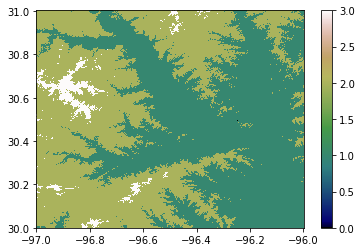

In [35]:
plt.pcolormesh(x,y, t_reclass, cmap="gist_earth") 
plt.colorbar()

Now, the only thing missing, is an adjustment of the colorbar. Currently it shows unneccessary values. This can be adjusted with defining the parameters `boundaries` and `ticks` in the [`colorbar()` function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html), by providing an arrays of tick mark and tick values using the `numpy.linspace()` function, similar to above:

In [36]:
np.linspace(1.5,4.5,4)

array([1.5, 2.5, 3.5, 4.5])

We can use this function to generate an array selecting those values from the original colorbar we want to leave in the colorbar and pass it to `boundaries` parameter. In our case this should be 1.5, 2.5 and 3, since these are the colors that we will see for the classes 1, 2 and 3. Then we pass another array to the `ticks` parameter, that contains the new values for the ticks at those locations, which should be 1, 2 and 3 in our case. All together, this looks like the following:

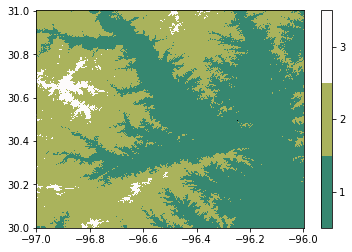

In [37]:
classImage = plt.pcolormesh(x,y, t_reclass, cmap="gist_earth") 
plt.colorbar(boundaries=np.linspace(0.5,3.5,4), ticks=np.linspace(1,4,4)) 

Great. Exactly what we wanted!

---
# C. Enriching Matplotlib Maps

In this part we want to add some raster and vector data to our map. Below we will load and plot an topographic image (raster data) using the matplotlib module. This will be done with the code built during the previous part. After that, you will learn how to reduce the raster dataset to a certain bounding box and how to add vector data provided in lists or .csv-files.

### Importing and viewing the dataset

Let's begin with the IPython magic command to get our plots inline and with importing the modules we will need:

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Now, the code sequence below reads and plots a Shaded Relief map of the USA, stored in the file `./data_SimpleGIS/US_MSR_lowRes_terrain.dat`. The data are providing grayscale shading based on NASA's Shuttle Radar Topography Mission (SRTM). The data were aquired from the website of [Natural Earth](https://www.naturalearthdata.com/10m-manual-shaded-relief/manual-shaded-relief-of-contiguous-us/), where you can get more information on them. For this exercise, we have downscaled the resolution of the map to 0.04 degree in latitude and longitude direction and saved it in a text file using space delimiters and added the metadata to the header. The raster data have a mercator projection in WGS84 coordinates, exactly as in the previous notebook lesson.

Open the file on the JupyterHub to inspect it. The header contains the following information:

    ncols        1664
    nrows        1012
    xllcorner    -129.9727818920000004
    yllcorner    15.5224817269999988
    cellsize     0.04001
    NODATA_value filled
    
We are saving the data in the variable: `terrainUS` and then plotted on a reversed gray scale `Greys_r`. Based on the header information we also re-create the x and y arrays providing a coordinate for each point in the array, congruent to the example in the previous notebook lesson:

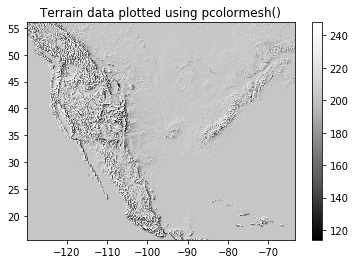

In [6]:
# reading the file using numpy function genfromtxt, skipping header
filename = "./data/US_MSR_lowRes_terrain.dat"  # USA Shaded relief data
terrainUS = np.genfromtxt(filename, delimiter=' ', skip_header=6) 

# defining information from file header
xllcorner = -129.9727818920000004
yllcorner =  15.5224817269999988
cellsize  =   0.04001
[yDim,xDim] = terrainUS.shape

# Creating meshgrids x and y that hold lon and lat coordinates for each data point
x_col = np.empty(terrainUS.shape)
y_col = np.empty(terrainUS.shape)
x_col = np.linspace(xllcorner,xllcorner+cellsize*(xDim+1), xDim)
y_col = np.linspace(yllcorner,yllcorner+cellsize*(yDim+1), yDim)
y_col = np.flip(y_col)
x, y = np.meshgrid(x_col,y_col)

# plotting the relief data with labeled axes: coordinates
plt.pcolormesh(x,y, terrainUS) 
plt.title("Terrain data plotted using pcolormesh()")
plt.colorbar()

# plotting the relief with a reversed gray scale colorbar
plt.set_cmap('Greys_r')

Let's also get some info about the size and content of the dataset:

In [7]:
terrainUS.shape

(1012, 1664)

This means, we have 1012 grid points along y (latitude) direction and 1664 grid cells along x (longitude) direction.

In [8]:
terrainUS.min()

114.0

In [9]:
terrainUS.max()

248.0

The relief data have values between 114 and 248, where a flat gray value of 203 stands for water areas. 

### Printing only parts of the relief image

Now, we do not need the entire relief dataset, we want to only plot (or process) part of it. We want to use this data to make a map of the SW USA. So let's see how we can cut this down a bit. We would like to have only those parts in the image that are contained within the following limits in longitudinal and latitudinal direction:

In [10]:
latMin = 31
latMax = 46
lonMin = -125
lonMax = -108

But how to we cut the dataset to this? We know we can slice numpy data arrays like this:

In [11]:
x_cut = x[0:500,0:800]
y_cut = y[0:500,0:800]
terrainUS_cut = terrainUS[0:500,0:800]

It is important to slice each of the three arrays (`terrainUS`, `x` and `y`) in the same way. 

Let's see what we get from simply slicing out the first half of the image in each directions, by plotting the sliced array `terrainUS_cut` together with the sliced coordinate arrays `x_cut` and `y_cut`:

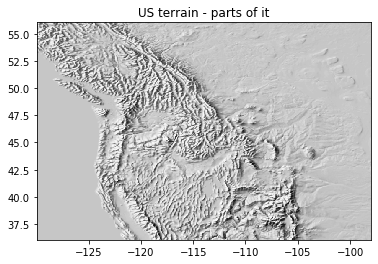

In [16]:
plt.pcolormesh(x_cut,y_cut, terrainUS_cut) 
plt.title("US terrain - parts of it")
plt.set_cmap('Greys_r')

This reduces the data set, but not exacly as we want. And it would be too much guess work to adjust the map frame manually like this. But with the right numpy functions and coding statements, we can search the correct indexes to slice the arrays and cut this relief to a very specific bounding box.

### Cutting the dataset to a certain bounding box

In this section, we will trim our relief data to a very certain bounding box, the one for the SW study area we have given above

    latMin = 31
    latMax = 46
    lonMin = -125
    lonMax = -108

If our entire data array `terrainUS` of shape `(1012, 1664)` represents the original map frame as indicated in the image below by the blue box, we now want to have a new array `terrainUS_SW` that is cut down to the SW bounding box defined by the given max/min coordinates. In the image below, this should be similar as cutting the blue map frame down to the orange box:

<img src="./img/M61_reduceBBox.png" width="300" />

To realize that, we have to find out, which numpy index in the x and y coordinates relate exactly to those coordinates and then use these index again for all three arrays (data and coordinates).

Let's find the index for the `latMax` in the `y` array first. 

For this we only need to search the 1D x and y coordinate vectors `x_col` and `y_col` from above (that we have used as base for generating the meshgrid). This will make the search easier, because we actually have redundand values in the 2D arrays `x` and `y`.

So using only the coordinate columns, we can then calculate the difference for each lat/lon coordinate to the boundary lat/lon coordinates respectively. The lat/lon coordinate with the lowest difference to the boundary values will be the one for which we need to extract the index. To realize that, we apply the numpy functions [`argmin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) and [`abs()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html#numpy.absolute). 

The chained command for estimating the index in the dataset for the boundary value `latMax` has the following three steps:

* `y_col-latMax`: Gstimating difference between all latitudes in y_col to the maximum latitude of the bounding box
* `np.ab(y_col-latMax)`: Getting the absolut value of all differences to latMax
* `argmin(np.ab(y_col-latMax))`: Finding the smalles absolute value of all differences to latMax

Use the linked numpy document pages for these functions to find more details about them. Now we apply this logic for all four boundary coordinates and estimate their respective indexes in the x (lon) or y (lat) directions:

In [18]:
idx_latMax = np.argmin(np.abs(y_col-latMax))
print("Index in y direction, relating to latMax:", idx_latMax)

Index in y direction, relating to latMax: 251


In [19]:
idx_latMin = np.argmin(np.abs(y_col-latMin))
print("Index in y direction, relating to latMin:", idx_latMin)

Index in y direction, relating to latMin: 625


In [20]:
idx_lonMax = np.argmin(np.abs(x_col-lonMax))
print("Index in x direction, relating to lonMax:", idx_lonMax)

Index in x direction, relating to lonMax: 549


In [21]:
idx_lonMin = np.argmin(np.abs(x_col-lonMin))
print("Index in x direction, relating to lonMin:", idx_lonMin)

Index in x direction, relating to lonMin: 124


Having these indexes, we can now slice our arrays for getting exactly the cut out of the  SW USA from the shaded relief dataset in the following way:

In [22]:
terrainUS_SW = terrainUS[idx_latMax:idx_latMin,idx_lonMin:idx_lonMax]

And we do the same for the meshgrid arrays x and y:

In [23]:
x_SW = x[idx_latMax:idx_latMin,idx_lonMin:idx_lonMax]
y_SW = y[idx_latMax:idx_latMin,idx_lonMin:idx_lonMax]

In [24]:
terrainUS_SW.shape

(374, 425)

And then we can do a visual check if we are satisfied with this:

Text(0.5, 0, 'lon')

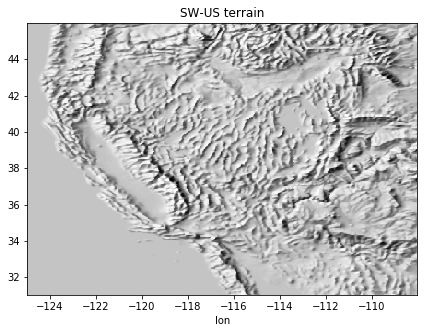

In [37]:
plt.pcolormesh(x_SW,y_SW, terrainUS_SW) 
plt.title("SW-US terrain")
plt.set_cmap('Greys_r')

Looks good. For example, you can see the Pacific Ocean at the left side as well as California's Central Valley near the coast and the Sierra Nevada Mountains right next to it.

Now, if you like to choose another set of coordinates for the bounding box, you only need to change the values for the bounding box parameter `latMin`, `latMax`, `lonMin` and `lonMax` in that cell above, where we have defined them and then run all following cells. This way, you can select the shaded relief for any geographical region available in the dataset!

### Adding cities to the map

Now, let's add the location of the Arizona State University to the map!

The coordinates of Tempe are 33°24′46″N 111°56′35″W. In decimals degrees we get:

In [26]:
latTempe = 33 + 24/60 + 46/3600
lonTempe = -(111+ 56/60 + 35/3600)

Now we can use this to add a point and a label to the map. Check the function [`plt.text()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) on the documentation pages for its numerous design options!.

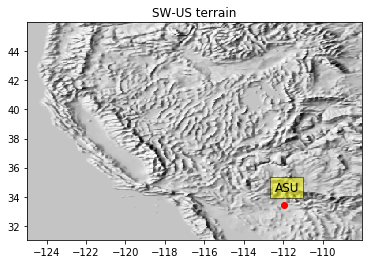

In [27]:
plt.pcolormesh(x_SW,y_SW, terrainUS_SW) 
plt.title("SW-US terrain")
plt.plot(lonTempe, latTempe, 'ro')
plt.text(lonTempe-0.5, latTempe+1, 'ASU',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.5))
plt.set_cmap('Greys_r')

If we have a list of cities, we can add them as well!

In [28]:
latCaliforniaCities = [34.0522342, 37.7749295, 41.5265092]
lonCaliforniaCities = [-118.2436849, -122.4194155, -124.03840689999998]

Any guesses, which cities these are?

In [29]:
namesCaliforniaCities = ['Los Angeles', 'San Francisco' , 'Klamath']

Let's add them to the map. To also add labels for all cities, we write a for-loop around the plt.text() function, processing all items in the cities list.

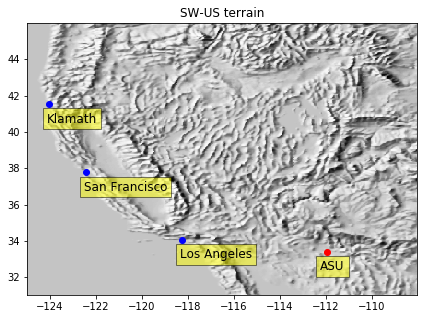

In [30]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.pcolormesh(x_SW,y_SW, terrainUS_SW) 
plt.title("SW-US terrain")
plt.plot(lonTempe, latTempe, 'ro')
plt.text(lonTempe-0.3, latTempe-1, 'ASU',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.5))
plt.plot(lonCaliforniaCities, latCaliforniaCities, 'bo')
for i in range(len(namesCaliforniaCities)):
    plt.text(lonCaliforniaCities[i]-0.1, latCaliforniaCities[i]-1, namesCaliforniaCities[i],fontsize=12,bbox=dict(facecolor='yellow', alpha=0.5))
plt.set_cmap('Greys_r')

### Adding state boundaries from textfiles to the map

In the next step we want to add some state boundaries to the map. For that we are providing you with lat/lon coordinates of the state boundaries stored in csv-files in the folder `assignments_M6/data_SimpleGIS/StateBoundaries`. Let's load the boundaries of four of the US-Southwest states: Arizona, California, Nevada and Utah. Each state is abbreviated with their official acronym (AZ, CA, NV, UT). For example, the file name for AZ is `AZ_boundaries.csv`

In [32]:
filename = "./data/AZ_boundary.csv" 
AZborder = np.genfromtxt(filename, delimiter=',', skip_header=1) 
filename = "./data/CA_boundary.csv" 
CAborder = np.genfromtxt(filename, delimiter=',', skip_header=1) 
filename = "./data/NV_boundary.csv" 
NVborder = np.genfromtxt(filename, delimiter=',', skip_header=1) 
filename = "./data/UT_boundary.csv" 
UTborder = np.genfromtxt(filename, delimiter=',', skip_header=1) 

Let's look at the first 5 entries in the AZ border polygon, you can see the WGS84 latitude and longitude coordinates:

In [33]:
AZborder[:5,:]

array([[  32.72, -114.72],
       [  32.75, -114.68],
       [  32.73, -114.53],
       [  32.75, -114.52],
       [  32.8 , -114.53]])

We could also have easily switched to the pandas module to read those files. Pandas is optional content of M6, but we would like to give you a brief example:

In [34]:
import pandas as pd
AZborder_pandas = pd.read_csv('./data/AZ_boundary.csv')

You can have a look into the pandas DataFrame (which is the term of data objects in Pandas), which prints as a good looking table:

In [35]:
AZborder_pandas

,Lat,Lon
0,32.72,-114.72
1,32.75,-114.68
2,32.73,-114.53
3,32.75,-114.52
4,32.80,-114.53
...,...,...
79,32.62,-114.80
80,32.65,-114.75
81,32.72,-114.72
82,32.72,-114.72


The pandas DataFrame is easier to handle, since we do not need to study the indexes of the dataset, but we can reference each column by their header names, for example `AZborder.Lon`. 

Both of the imported datasets for the state boundaries - Numpy array as well as Pandas DataFrames - can be used for plotting the borders into the map:

Text(0, 0.5, 'Latitude')

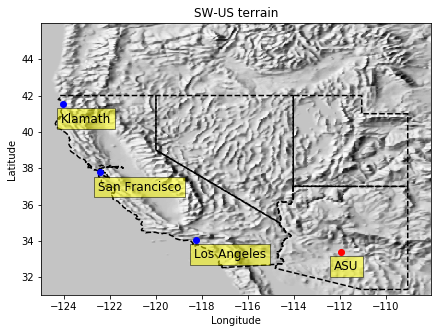

In [38]:
# plotting relief data with reverse gray scale colormap
plt.pcolormesh(x_SW,y_SW, terrainUS_SW)  
plt.set_cmap('Greys_r')

# plotting state borders
plt.plot(CAborder[:,1], CAborder[:,0], 'k--')             # numpy array for CA 
plt.plot(NVborder[:,1], NVborder[:,0], 'k--')
plt.plot(UTborder[:,1], UTborder[:,0], 'k--')
plt.plot(AZborder_pandas.Lon, AZborder_pandas.Lat, 'k--') # pandas DataFrame for AZ
#plt.plot(AZborder[:,1], AZborder[:,0], 'k--')            # numpy array for AZ

# plotting cities and their labels
plt.plot(lonTempe, latTempe, 'ro')
plt.text(lonTempe-0.3, latTempe-1, 'ASU',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.5))
plt.plot(lonCaliforniaCities, latCaliforniaCities, 'bo')
for i in range(len(namesCaliforniaCities)):
    plt.text(lonCaliforniaCities[i]-0.1, latCaliforniaCities[i]-1, namesCaliforniaCities[i],fontsize=12,bbox=dict(facecolor='yellow', alpha=0.5))

# adding some labels
plt.title("SW-US terrain")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Now we have a decent map of the Southwestern USA. However, in GIS we do want much more than just making maps. In the next and last notebook, you will learn how you will be able to use data from, e.g. NASA data archives in Python. 

# Conclusion

From the examples provided in this notebook, you should now be able to plot any geographical dataset that is stored in a numpy array and for which you have information on the array coordinates. (Alternatively, as we will see in the next notebook, you could also receive the arrays together with the dataset.) In addition you are able to choose among various types of plots for your data, you can add different colorbars and manipulate their labels. You can also add vector data to the map that you have given in Python object types or textfiles. 

In the upcoming last notebook, we will utilitize and expand your knowledge to perform simple GIS tasks.